# Chapter 4. Describing Relationships

## 4.1 What is a relationship?

- generally not interested in the distribution of a single variable, but how multiple variables are related
    - by "relationship," mean what does information about one variable tell us about the other
- example data for this chapter from Emily Oster, 2020
    - goal: "do the health benefits of recommended medications look better than they actually are because already-otherwise-healthy people are more likely to follow the recommendations?"
    - "examining the relationship between taking vitamin E, other indicators of caring about your health like not smoking, and outcomes like mortality, and how those relationships change before, during, and after the time vitamin E was recommended"

## 4.2 Conditional distributions

- the distribution of one variable given information about another

## 4.3 Conditional means

- can make estimates on the conditional distributions just like on the distributions of individual variables (i.e. marginal distributions)
    - e.g. what is the average of $A$ for each category of $B$
- multiple approaches for continuous variables: binning or LOESS are common options

## 4.4 Line fitting

- a.k.a regression
- estimating the relationship of variables under some underlying shape
    - requires the user to make an assumption on the shape of the underlying relationship that could be completely wrong
- can express nonlinear relationships of variables in a linear regression by transformations of the data (e.g. $ln(x)$ or $x^2$)
- can also use a link function $F$ as in $Y = F(\beta_0 + \beta_1 X)$
    - decide on the function $F$ depending on the desired relationship between $Y$ and $X$

## 4.5 Conditional conditional means, a.k.a. "controlling for a variable"

- can think of the residual as the part of $Y$ that has nothing to do with $X$
- a process controlling for some variable $Z$:
    1. calculate the relationship of $Y$ given $Z$ and take the residual $Y^R$
    1. calculate the relationship of $X$ given $Z$ and take the residual $X^R$
    1. find the relationship between $Y$ and $X$ accounting for $Z$ by regressing $Y^R$ on $X^R$
- can accomplish this using ordinary least squares (OLS) regression, too: $Y = \beta_0 + \beta_1 X + \beta_2 Z$

## 4.6 What we're not covering

- there are more details yet to be discussed in later chapters

## 4.7 Relationships in software

- data for this book is available in the `causaldata` package

```bash
pip install causaldata
```

- some examples of loading and visualizing the data from Mroz 1987 on women's labor force participation

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
from causaldata import Mroz

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
# Read in data, keep just working women, and create unlogged earnings
dt = Mroz.load_pandas().data.drop(columns=["Unnamed: 0"])
dt = dt[dt["lfp"]].reset_index(drop=True)
dt.loc[:, "earn"] = dt["lwg"].apply("exp")

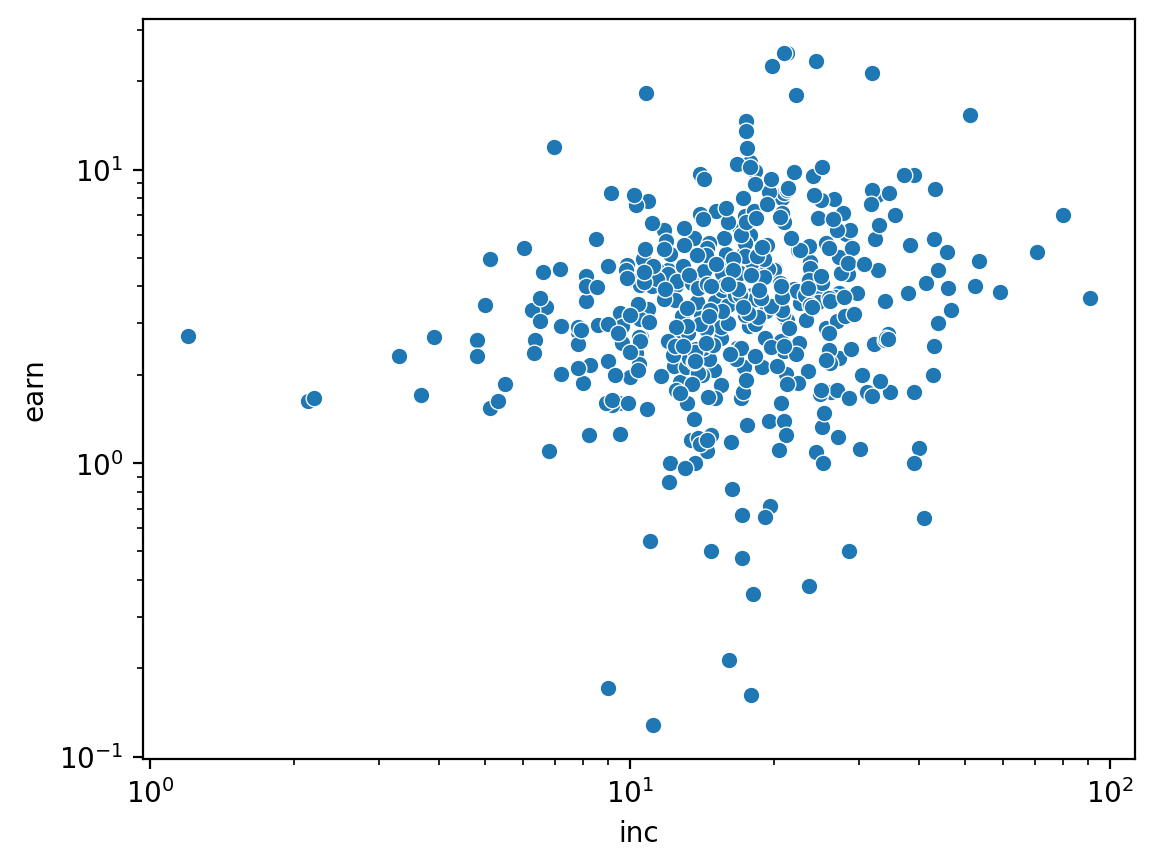

In [4]:
# Draw a scatterplot
sns.scatterplot(x="inc", y="earn", data=dt).set(xscale="log", yscale="log");

In [5]:
# Get the conditional mean by college attendance
# `wc` is the college variable
dt.groupby("wc")[["earn"]].mean()

,earn
wc,
False,3.583539
True,5.349448


In [6]:
# Get the conditional mean by bins (cutting into 10 bins).
dt.loc[:, "inc_bin"] = pd.cut(dt["inc"], 10)
dt.groupby("inc_bin")[["earn"]].mean()

,earn
inc_bin,
"(-0.12, 9.074]",3.091594
"(9.074, 18.177]",3.826430
"(18.177, 27.28]",4.954454
"(27.28, 36.383]",4.563332
"(36.383, 45.485]",4.241790
"(45.485, 54.588]",6.139739
"(54.588, 63.691]",3.825000
"(63.691, 72.794]",5.232558
"(72.794, 81.897]",7.015306


/usr/local/Caskroom/miniconda/base/envs/the-effect-notes/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: xlabel='linc', ylabel='lwg'>

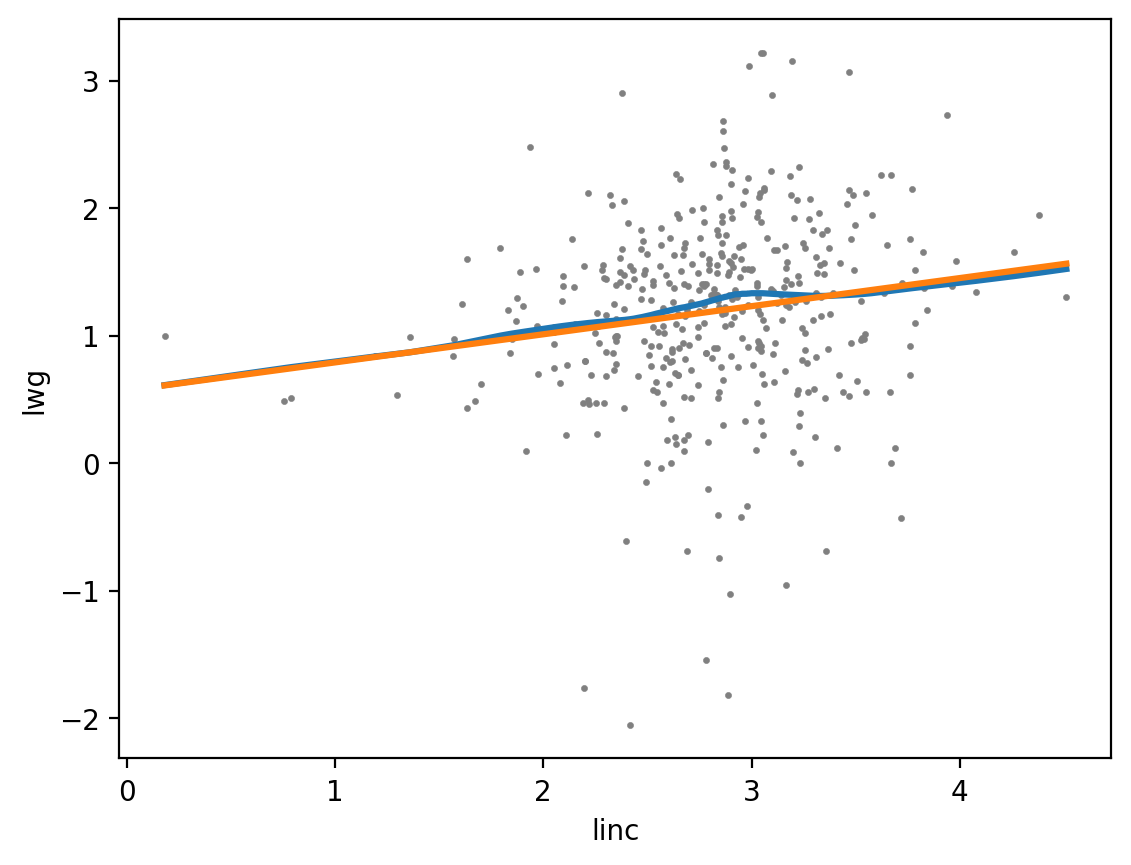

In [7]:
# Draw the LOESS and linear regression curves
dt.loc[:, "linc"] = dt["inc"].apply("log")
sns.scatterplot(x="linc", y="lwg", data=dt, color="grey", s=5, edgecolor=None)
sns.regplot(x="linc", y="lwg", data=dt, lowess=True, scatter=False)
sns.regplot(x="linc", y="lwg", data=dt, ci=None, scatter=False)

In [8]:
# 5. Run a linear regression, by itself and including controls
m1 = sm.ols(formula="lwg ~ linc", data=dt).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                    lwg   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     11.65
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           0.000703
Time:                        08:12:41   Log-Likelihood:                -461.34
No. Observations:                 427   AIC:                             926.7
Df Residuals:                     425   BIC:                             934.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5690      0.185      3.079      0.0

In [9]:
# k5 is number of kids under 5 in the house
m2 = sm.ols(formula="lwg ~ linc + wc + k5", data=dt).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                    lwg   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     10.67
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           8.92e-07
Time:                        08:12:41   Log-Likelihood:                -451.54
No. Observations:                 427   AIC:                             911.1
Df Residuals:                     423   BIC:                             927.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7065      0.184      3.833      0.0

---

## Session information

In [10]:
%load_ext watermark
%watermark -d -u -v -iv -b -h -m

Last updated: 2022-11-30

Python implementation: CPython
Python version       : 3.10.8
IPython version      : 8.6.0

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 21.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit

Hostname: JHCookMac.local

Git branch: master

statsmodels: 0.13.5
pandas     : 1.5.2
causaldata : 0.1.3
seaborn    : 0.12.1

